# Homework 01: This homework is garbage!

The city of Trashalot has a big problem with waste treatment. 
Luckily there is one private company Dumpstar that has an incinerator to burn trash and produce electricity. 

Everything has been going relatively well, but all of a sudden the waste produced by Trashalot has increased. The owner of Dumpstar, however, is refusing to burn more trash. He says that the yield of the incinerator decreases if too much waste is introduced per month. Moreover, he will have to pay his employees for their overtime and that makes increasing the amount of waste to treat not profitable for his company.

The mayor of Trashalot then has an idea: she will lower taxes on workers' overtime to incentivize Dumpstar to burn more. However she quickly realizes that if she lowers the taxes too much, then Dumpstar will start importing trash from abroad to cash in on the state support: she definitely does not want that to happen.

How much should the mayor of Trashalot reduce the taxes to make sure that Dumpstar decides to burn all the trash in Trashalot, but not more?

## Part 1

Assume that the amount of burned waste per month is
\begin{equation}
    w
\end{equation}

The amount of produced electricity is not linear with the trash burned, since the incinerator loses efficiency if too much waste is introduced. Let us assume that the price of electricity is instead fixed. For that reason the earnings $E$ in dollars of Dumpstar in depenence of the amount of trash burned per month is:
\begin{equation}
    E = \alpha \arctan (\beta w )
\end{equation}
where $\alpha$, and $\beta$ are known parameters.

The costs that Dumpstar has are split into fixed and variable costs. Maintaining the infrastructure and paying all fixed time employees costs Dumpstar $F$ dollars per month
\begin{equation}
    C_F = \pi
\end{equation}

Then Dumpstar needs to pay its workers an hourly rate, which however increases if they do overtime. This hourly salary for overtime is further increased by a tax:
\begin{equation}
    C_V = (\gamma + T) \frac{ 2 e^{\xi (w - w_0)} + 1}{e^{\xi (w - w_0)} + 1}
\end{equation}
where $\epsilon$, $\gamma$, $\xi$ and $w_0$ are known parameters. Instead $T$ is the tax that the mayor of Trashalot can modify.

The net profit per month for Dumpstar is therefore
\begin{equation}
    N = \alpha \arctan (\beta w ) - \pi - w (\gamma + T) \frac{ 2 e^{\xi (w - w_0)} + 1}{e^{\xi (w - w_0)} + 1}
\end{equation}

The owner of Dumpstar will choose the amount of warste that his company will burn in order to maximize his profit.

What is the tax that the mayor of Trashalot should set, in order to make sure that Dumpstar burns exactly $\Omega$ tons of trash each month?

Notice: I have not checked whether the problem can be solved analytically. Even if it can, solve it numerically. You are anyway allowed to calculate derivatives, if you want.

Use the parameters below

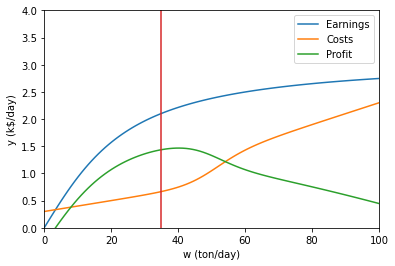

In [1]:
import numpy as np
import matplotlib.pyplot as plt

w = np.linspace(0,100, 100)

beta  = 0.05; # parameter in earnings
alpha = 2.;   # parameter in earnings
pi    = .3;   # fixed costs
gamma = .01;  # parameter in variable costs
xi    = 0.2;  # parameter in variable costs
w0    = 50;   # parameter in variable costs

desiredW = 35 # Desired amount of thrash that the mayor wants to be burned

plt.plot(w, alpha * np.arctan(beta * w), label = "Earnings");
plt.plot(w, pi + w * gamma * (2*np.exp(xi * (w-w0))+1)/(np.exp(xi * (w-w0))+1), label = "Costs");
plt.plot(w, alpha * np.arctan(beta * w) - pi - w * gamma * (2*np.exp(xi * (w-w0))+1)/(np.exp(xi * (w-w0))+1), label = "Profit");
plt.plot(2*[desiredW], [0.,4]);
plt.xlabel('w (ton/day)'); plt.ylabel('y (k$/day)'); plt.legend(); plt.xlim(0,100); plt.ylim(0,4);

Write your solution here. You are allowed to copy code from class, and modify it if needed.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#initializing
beta  = 0.05; # parameter in earnings
alpha = 2.;   # parameter in earnings
pi    = .3;   # fixed costs
gamma = .01;  # parameter in variable costs
xi    = 0.2;  # parameter in variable costs
w0    = 50;   # parameter in variable costs


def optimiseInterpol(funcToUse, xleft, xright , maxNumberIteration, 
                   positionToleranceAbsolute, valueToleranceAbsolute = 0.):
    """ Finds the maximum or minimum by using quadratic interpolation  """    
    
    # Construct the array of points at which to evaluate the function
    xs = np.array([xleft,(xleft+xright)/2,xright])   
    
    # evaluates the function at the current points
    fs = funcToUse(xs) 
    
    # To prevent the program from breaking, we assign values to these two variables
    # as if they are our very first guess of the position and value of the minimum
    xmin = (xleft+xright)/2
    fmin = fs[1]
    
    # We do not want the while loop to stop immediately, so we give an intitial value to our errors 
    # that will ensure that the loop is executed the first time
    positionError  = 10 * abs(positionToleranceAbsolute) + 1
    valueError     = 10 * abs(valueToleranceAbsolute) + 1

    # As we want to keep track of the number of iterations done, we initialise the counter to 0
    iteration = 0
    
    
    while (positionError > positionToleranceAbsolute and valueError > valueToleranceAbsolute) \
        and iteration < maxNumberIteration:
        # Increment the counter of number of iterations
        iteration += 1
        
        # Since xmin and fmin are going to be overwritten by the new guess, we store the current value
        oldx = xmin
        oldf = fmin
        
        
        # finds the position of the next guess at the position of the minimum and overwrites the old guess
        xmin    = - 0.5 * (xs[2]**2 * (fs[0] - fs[1]) + xs[1]**2 * (fs[2] - fs[0]) + 
                   xs[0]**2 * (fs[1] - fs[2])) / (xs[2] * (fs[1] - fs[0]) + xs[1] 
                * (fs[0] - fs[2]) + xs[0] * (fs[2] - fs[1]))
        fmin    = funcToUse(xmin)
        
        # Calculates the improvement in position and value compared to previous iteration
        # to be compared with tolerance
        positionError = abs(xmin-oldx)
        valueError    = abs(fmin-oldf)
        
        # finds the furthest point to discard
        distances = abs(xs-xmin)              # calculates the distance of the old points from new one
        indexFurthest = np.argmax(distances)  # find which is the furthest
        xs[indexFurthest] = xmin       # substitutes the furthest with the new one
        fs[indexFurthest] = fmin       # substitutes the value of f on the furthest with the value on the new one
        
    return xmin, fmin, iteration

def MaxProfit(tax):
    return optimiseInterpol(lambda w: alpha * np.arctan(beta * w) - pi - w * (gamma+tax) * (2*np.exp(xi * (w-w0))+1)/(np.exp(xi * (w-w0))+1), 0., 70, 1000, 0.001)

#check if it is working
print("The amount of waste to burn per month is %f for tax at 0.03"%(MaxProfit(0.03)[0]))
print("The amount of waste to burn per month is %f for tax at 0.00"%(MaxProfit(0)[0]))




The amount of waste to burn per month is 23.877464 for tax at 0.03
The amount of waste to burn per month is 40.162497 for tax at 0.00


The root is at 0.008051 and it takes 0 number of iterations
w is at 35.000000 for tax set at 0.008051


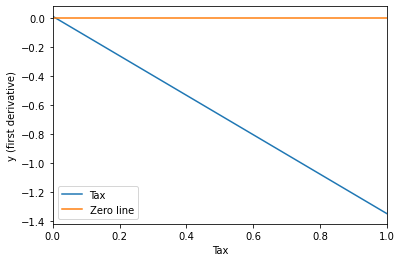

In [3]:
# Finding tax to achieve desiredW

w = desiredW
firstDerivate  = lambda tax: (alpha*beta)/(beta**2*w**2+1) - ((gamma + tax)*((2*np.exp(xi * (w-w0))+1)/(np.exp(xi * (w-w0))+1) + (xi*np.exp(xi * (w-w0))*w)/(np.exp(xi * (w-w0))+1)**2))

def findRootFalsePos(funcToUse, leftEdge, rightEdge, maxNumberIteration, 
                   positionToleranceAbsolute, valueToleranceAbsolute = 0.):
    """ Finds the root of a 1D function with False Positionsecant method """    
    fLeftEdge = funcToUse(leftEdge)
    fRightEdge = funcToUse(rightEdge)
    secant = (leftEdge * fRightEdge - rightEdge * fLeftEdge)/(fRightEdge - fLeftEdge)
    fSecant = funcToUse(secant)
    error = 10 * positionToleranceAbsolute  
    iteration = 0;
    
    while (error > positionToleranceAbsolute and abs(fSecant) > valueToleranceAbsolute) \
        and iteration < maxNumberIteration:
        iteration += 1
        if fLeftEdge * fSecant <= 0:
            rightEdge = secant
            fRightEdge = fSecant
        else: 
            leftEdge = secant
            fLeftEdge = fSecant
        oldSolution = secant
        secant = (leftEdge * fRightEdge - rightEdge * fLeftEdge)/(fRightEdge - fLeftEdge)
        fSecant = funcToUse(secant)
        error = abs(secant - oldSolution)
        
    return secant, iteration

root,noofiterations = findRootFalsePos(firstDerivate, 0.0, 1, 10000, 0.0001, 0.0001)
print("The root is at %f and it takes %d number of iterations" %(root,noofiterations))
      
#plotting and illustration
tax = np.linspace(0,1,100)
plt.plot(tax, firstDerivate(tax), label = "Tax")  
plt.plot([0,1], [0,0], label = "Zero line");
plt.xlabel('Tax'); plt.ylabel('y (first derivative)'); plt.legend(); plt.xlim(0,1);


#Verify w is approximately 35
print("w is at %f for tax set at %f"%(MaxProfit(root)[0],root))


## Part 2

You might have noticed that you cannot use the Newton-Raphson method to find the root in the problem above, since it is very hard to differentiate the function.

Now we want to construct a more efficient root finding method, which does not need the knowledge of the derivative and does not need to bracket the solution. We want to construct a Newton-Raphson method, where the derivative, instead of being calculated from a provided expression, is approximated.

You know that the derivative of a function is
\begin{equation}
    f'(x) = \lim_{\delta \rightarrow 0} \frac{f(x+\delta)- f(x)}{\delta}
\end{equation}

That gives an idea on how to approximate the derivative. We can take a small step $\Delta$ and 
\begin{equation}
    f'(x) \approx \frac{f(x+\Delta)- f(x)}{\Delta}
\end{equation}

Implement a method that works as the Newton-Raphson method, but where the derivative is estimated numerically.

Implement it using the function declaration below

In [4]:
def grad(func,x0):
    tri=0.001
    f1 =func(x0+tri/2)
    f2 = func(x0-tri/2)
    fprime= (f1-f2)/tri

    return fprime

def findRootNewtonRaphsonDiscr(funcToUse, stepForDeriv, xPos, maxNumberIteration, 
                   positionToleranceAbsolute, valueToleranceAbsolute = 0.,*, alpha = 1):
    
    fxPos = funcToUse(xPos)
    fderivxPos = stepForDeriv(funcToUse,xPos)
    newPos = xPos - fxPos/fderivxPos
    error = abs(newPos - xPos) 
    iteration = 0;
    
    while (error > positionToleranceAbsolute and abs(fxPos) > valueToleranceAbsolute) \
        and iteration < maxNumberIteration:
        iteration += 1
        xPos = newPos
        fxPos = funcToUse(xPos)
        fderivxPos = stepForDeriv(funcToUse,xPos)
        newPos = xPos - alpha * fxPos/fderivxPos
        error = abs(newPos - xPos) 
        
    return newPos, iteration

print("The root is at %f and it takes %d number of iterations"%findRootNewtonRaphsonDiscr(firstDerivate,grad,0,1000,0.001,alpha=0.4))



The root is at 0.008051 and it takes 1 number of iterations


## Part 3 [Difficult]

Solve the problem above with the new method.

Do you find any issues? In what situations? Can you figure out what causes the problems?

Show some examples of the problem and use the markdown box below to explain briefly why you think that happens.

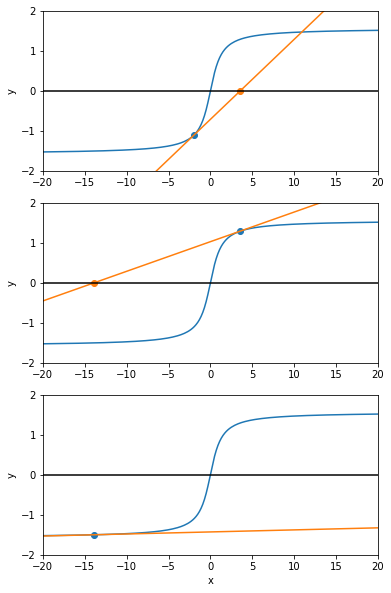

In [5]:
funtToUse = lambda x: np.arctan(x)
def grad(func,x0):
    tri=0.001
    f1 =func(x0+tri/2)
    f2 = func(x0-tri/2)
    fprime= (f1-f2)/tri

    return fprime

numberOfPlots = 3

# Construction of figures
fig, axs = plt.subplots(numberOfPlots); axs[-1].set_xlabel('x');
fig.subplots_adjust(wspace=0.2); fig.set_figheight(10)
x = np.linspace(-20., 20., 200)
y = funtToUse(x)
x0 = -2.

for subplt in axs:
    subplt.plot(x, y)
    subplt.scatter([x0],[funtToUse(x0)])
    ytangent = funtToUse(x0) + grad(funtToUse,x0)*(x-x0)
    subplt.plot(x, ytangent)
    subplt.set_ylabel('y');  subplt.set_ylim(-2.,2.); subplt.set_xlim(-20.,20.); 
    subplt.axhline(y=0, color='k')
    x0 = x0 - funtToUse(x0)/grad(funtToUse,x0)
    subplt.scatter([x0],[0])

The new method shares similar issues with the Newton-Raphson method. The solution keeps overshooting every step, making the method unstable. This method can be improved by introducing a variable alpha to slow the method down. The method tries to guess the next solution by the following equation 

$ x_{next} = (1-\alpha) * x_{old} + \alpha * \left( x_{old} - \dfrac{f(x_{old})}{f'(x_{old})} \right)$

The alpha takes in a range from 0-1 and with a lower 𝛼, the method will be slower but more stable. This method improves the method but it cannot be fixed entirely as alpha has to be tried with an appropriate value